## Titulo
Bank marketing campaign data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LinearRegression

### Paso 1

El objetivo principal es construir un modelo de clasificación que prediga si un cliente (o futuro cliente) suscribirá ("yes") o no suscribirá ("no") un depósito a plazo fijo, basándose en las características del cliente y de la campaña de marketing

### Paso 2

In [6]:
df = pd.read_csv("../data/raw/bank-marketing-campaign-data.csv", delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Paso 3

Una vez que hemos cargado el conjunto de datos, debemos analizarlo en su totalidad, sin distinción de train y test, para obtener conclusiones conjuntas. Una vez que tenemos la información cargada en una estructura de datos manejable como es un DataFrame de Pandas, podemos arrancar con el proceso.

In [7]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
df.shape

(41188, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### Paso 4

In [11]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
df.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [14]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Paso 5

Análisis de Variables Univariante

Una variable univariante es un término estadístico que se emplea para referenciar un conjunto de observaciones de un atributo. Esto es, el análisis columna a columna del DataFrame. Para ello, debemos distinguir si una variable es categórica o numérica, ya que el cuerpo del análisis y las conclusiones que se pueden obtener serán distintas.

Análisis de Variables Univariante Categóricas

Una variable categórica es un tipo de variable que puede tomar uno de un número limitado de categorías o grupos. Estos grupos son a menudo nominales (por ejemplo, el color de un coche: rojo, azul, negro, etc., pero ninguno de estos colores es inherentemente "mayor" o "mejor" que los demás) pero pueden también representarse mediante números finitos.

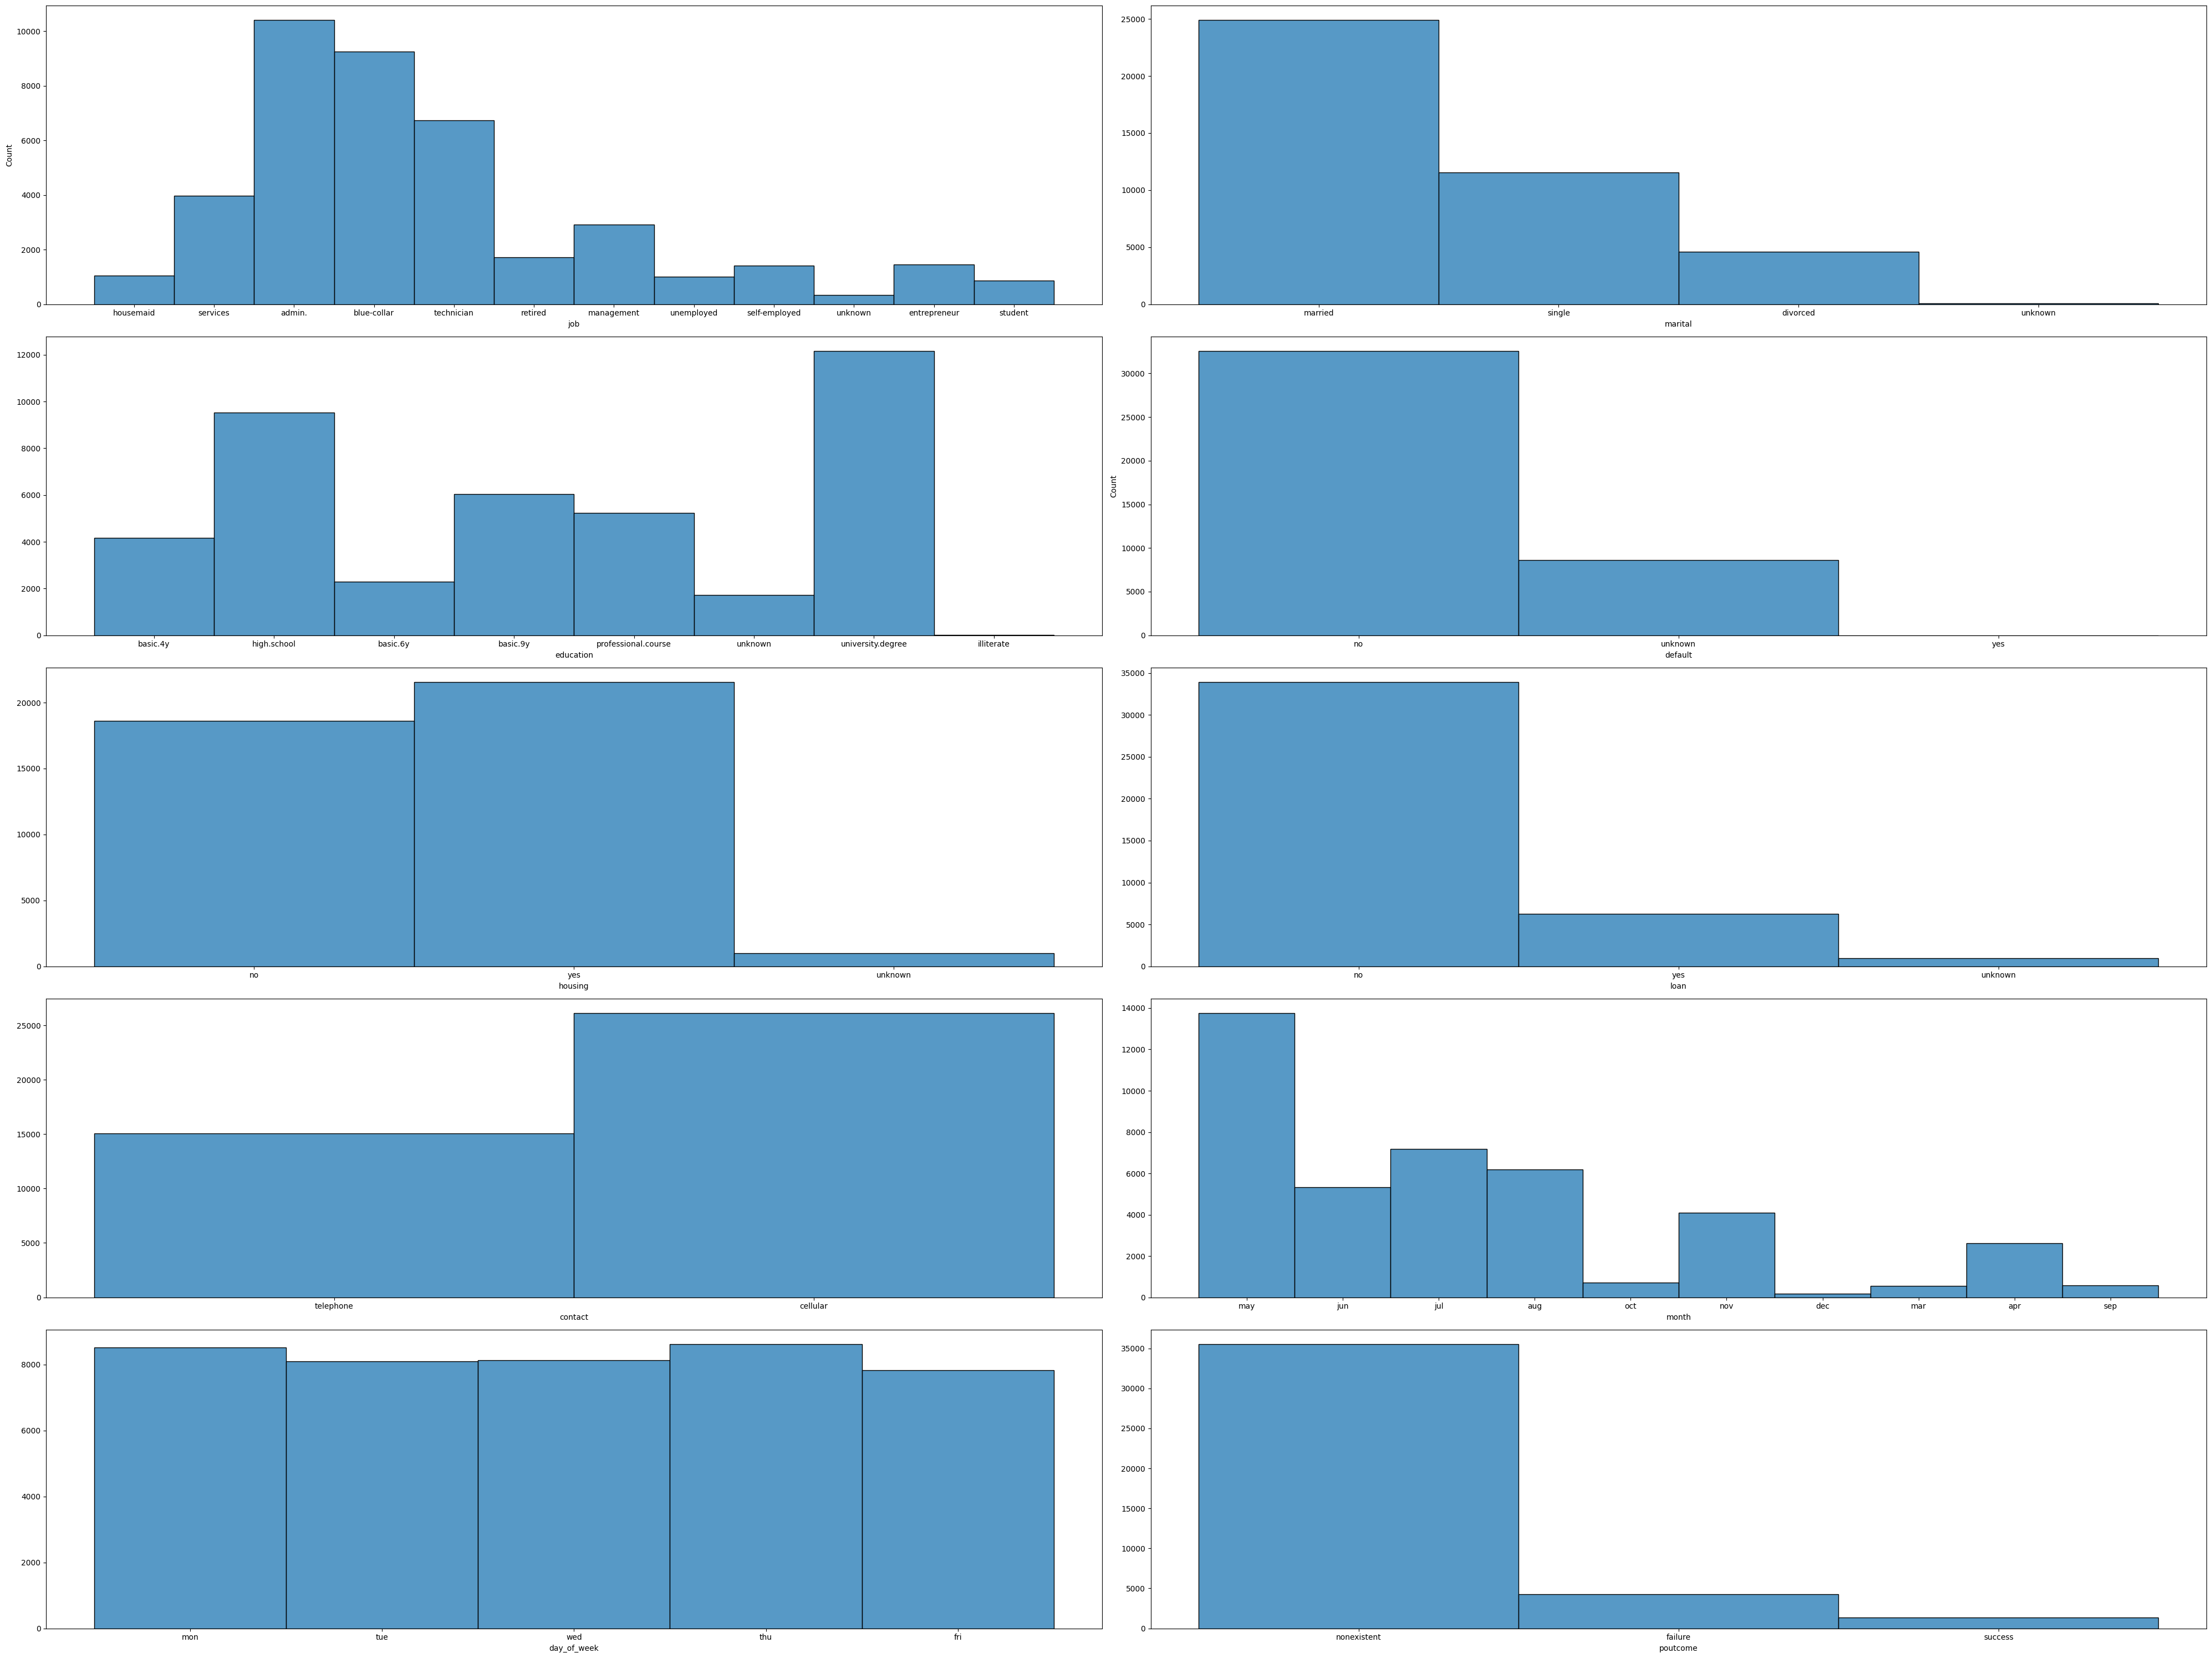

In [15]:
fig, axis = plt.subplots(5, 2, figsize=(40, 30))

sns.histplot(ax=axis[0, 0], data=df, x='job')
sns.histplot(ax=axis[0, 1], data=df, x='marital').set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=df, x='education').set(ylabel=None)
sns.histplot(ax=axis[1, 1], data=df, x='default')
sns.histplot(ax=axis[2, 0], data=df, x='housing').set(ylabel=None)
sns.histplot(ax=axis[2, 1], data=df, x='loan').set(ylabel=None)
sns.histplot(ax=axis[3, 0], data=df, x='contact').set(ylabel=None)
sns.histplot(ax=axis[3, 1], data=df, x='month').set(ylabel=None)
sns.histplot(ax=axis[4, 0], data=df, x='day_of_week').set(ylabel=None)
sns.histplot(ax=axis[4, 1], data=df, x='poutcome').set(ylabel=None)
plt.tight_layout()
plt.show()

Análisis de Variables Univariante Numéricas

Una variable numérica es un tipo de variable que puede tomar valores numéricos (enteros, fracciones, decimales, negativos, etc.) en un rango infinito. 

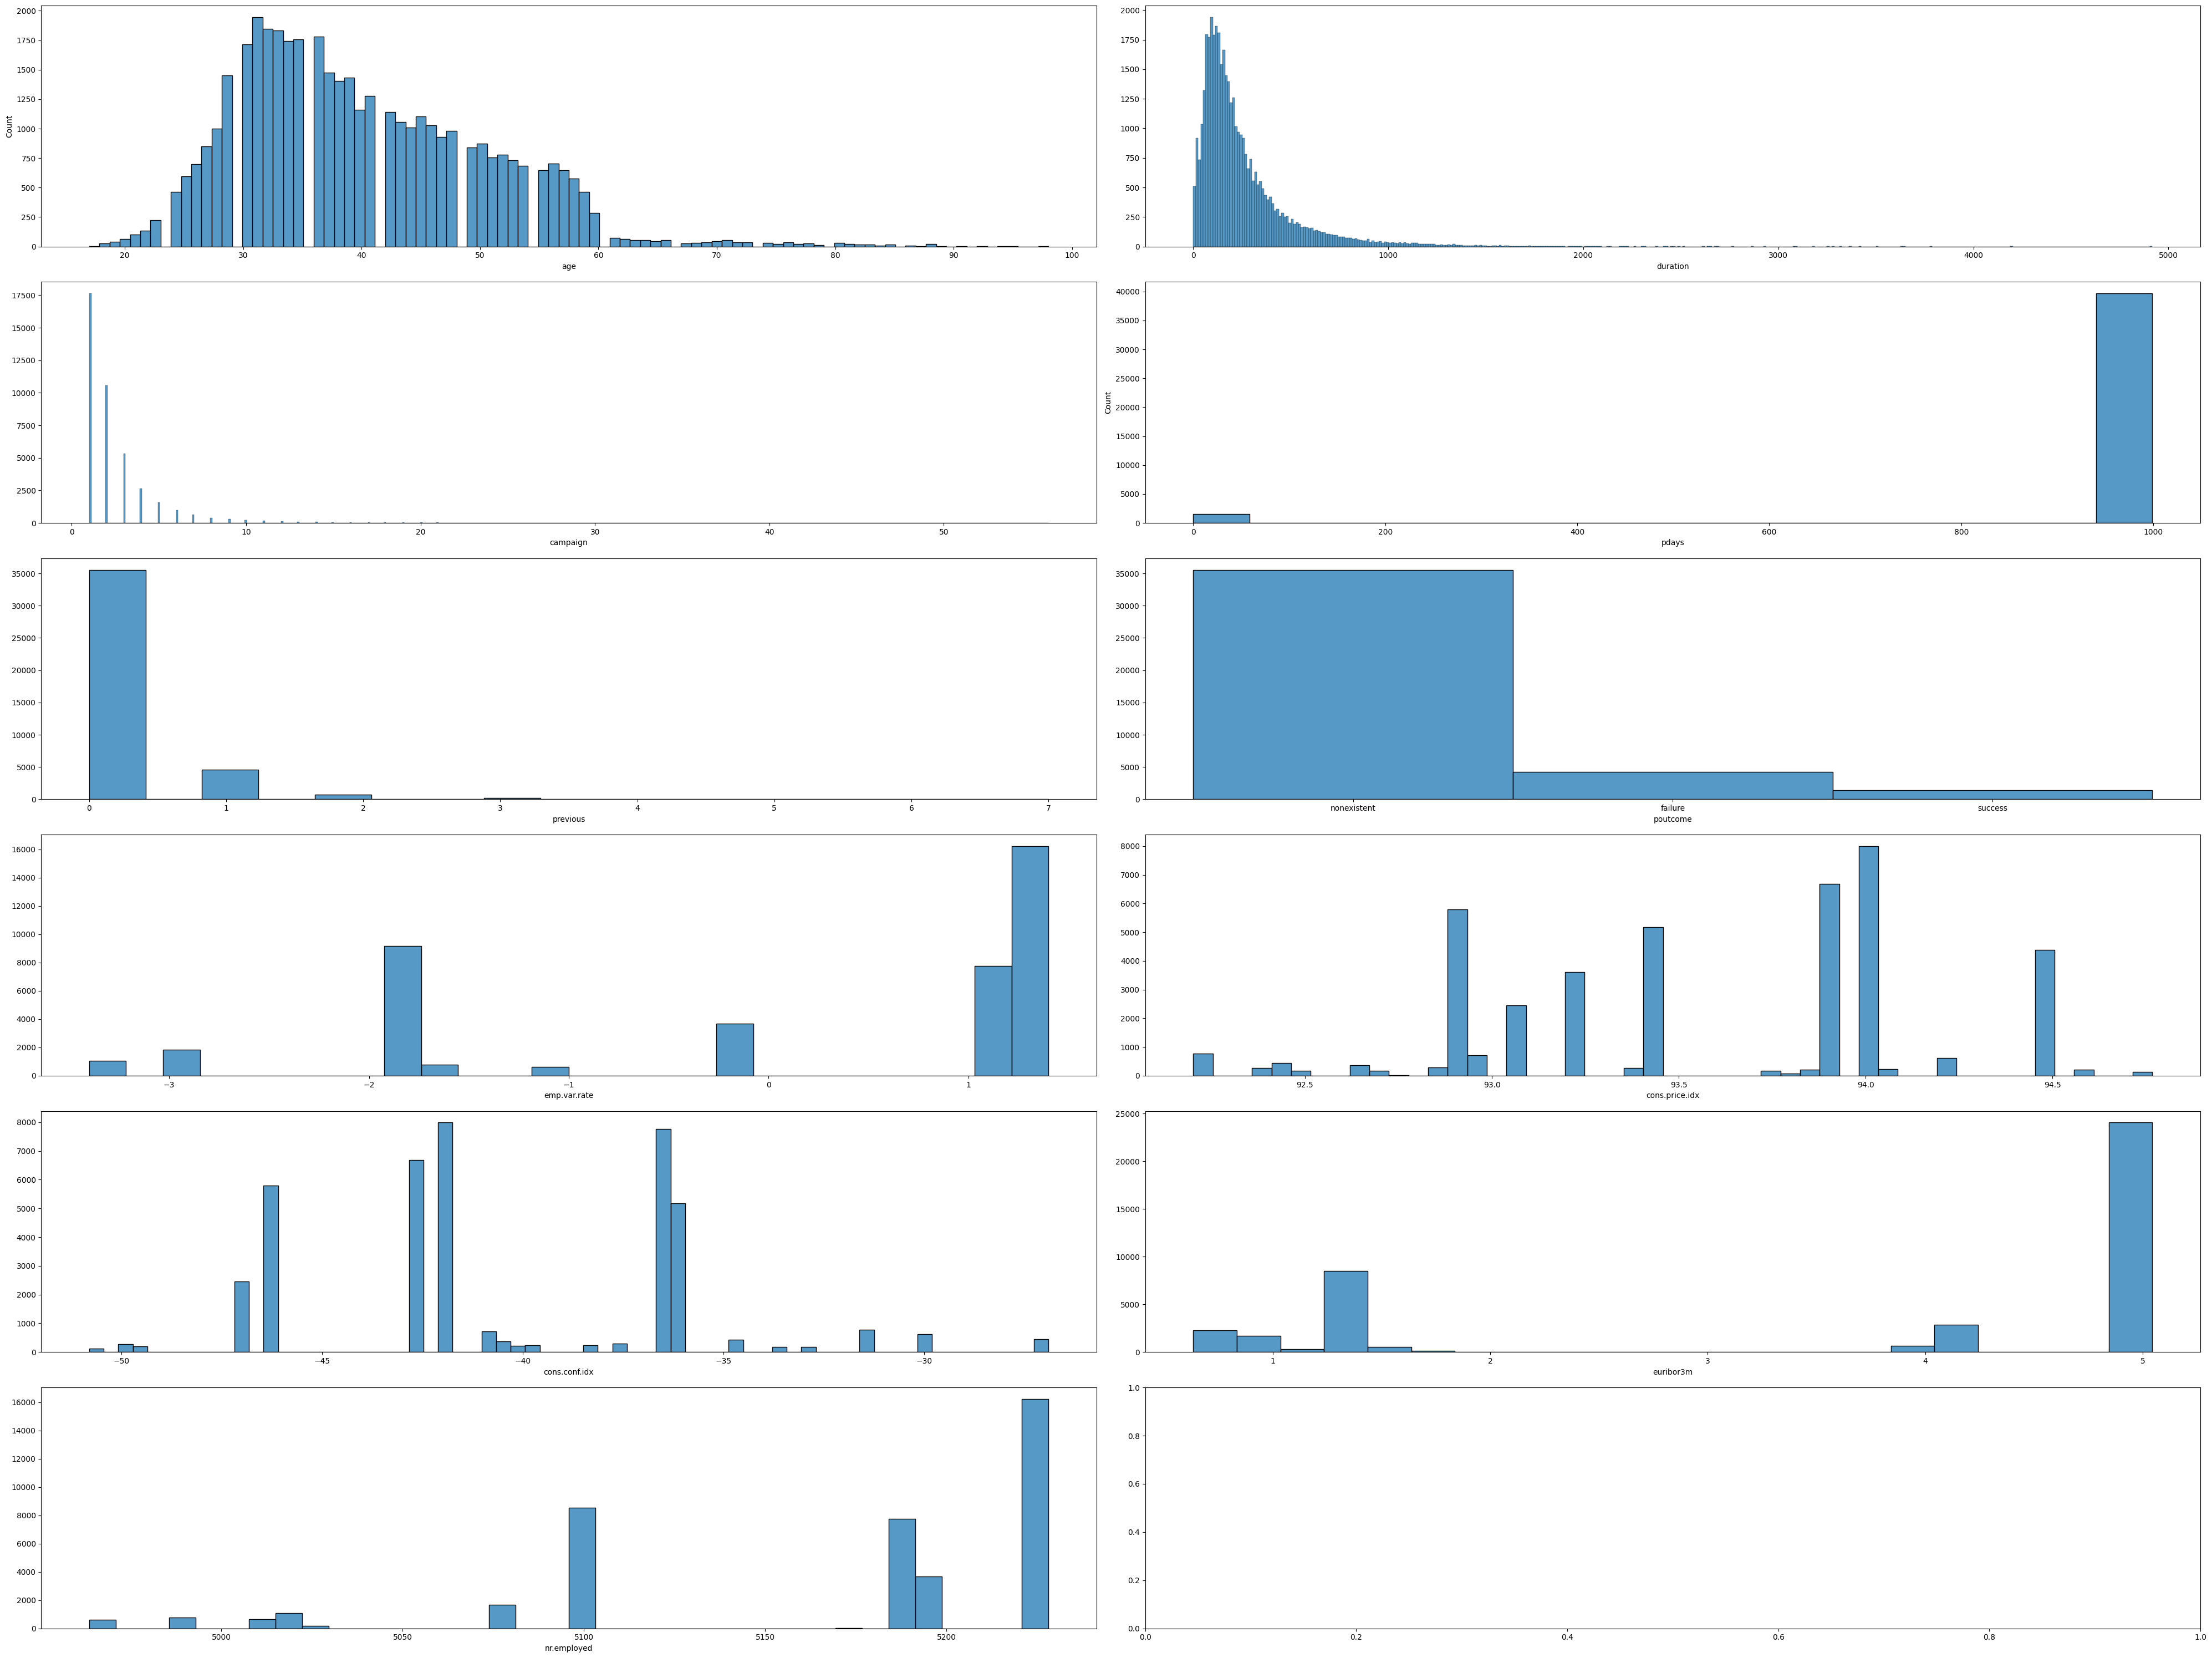

In [16]:
fig, axis = plt.subplots(6, 2, figsize=(40, 30))

sns.histplot(ax=axis[0, 0], data=df, x='age')
sns.histplot(ax=axis[0, 1], data=df, x='duration').set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=df, x='campaign').set(ylabel=None)
sns.histplot(ax=axis[1, 1], data=df, x='pdays')
sns.histplot(ax=axis[2, 0], data=df, x='previous').set(ylabel=None)
sns.histplot(ax=axis[2, 1], data=df, x='poutcome').set(ylabel=None)
sns.histplot(ax=axis[3, 0], data=df, x='emp.var.rate').set(ylabel=None)
sns.histplot(ax=axis[3, 1], data=df, x='cons.price.idx').set(ylabel=None)
sns.histplot(ax=axis[4, 0], data=df, x='cons.conf.idx').set(ylabel=None)
sns.histplot(ax=axis[4, 1], data=df, x='euribor3m').set(ylabel=None)
sns.histplot(ax=axis[5, 0], data=df, x='nr.employed').set(ylabel=None)

plt.tight_layout()
plt.show()



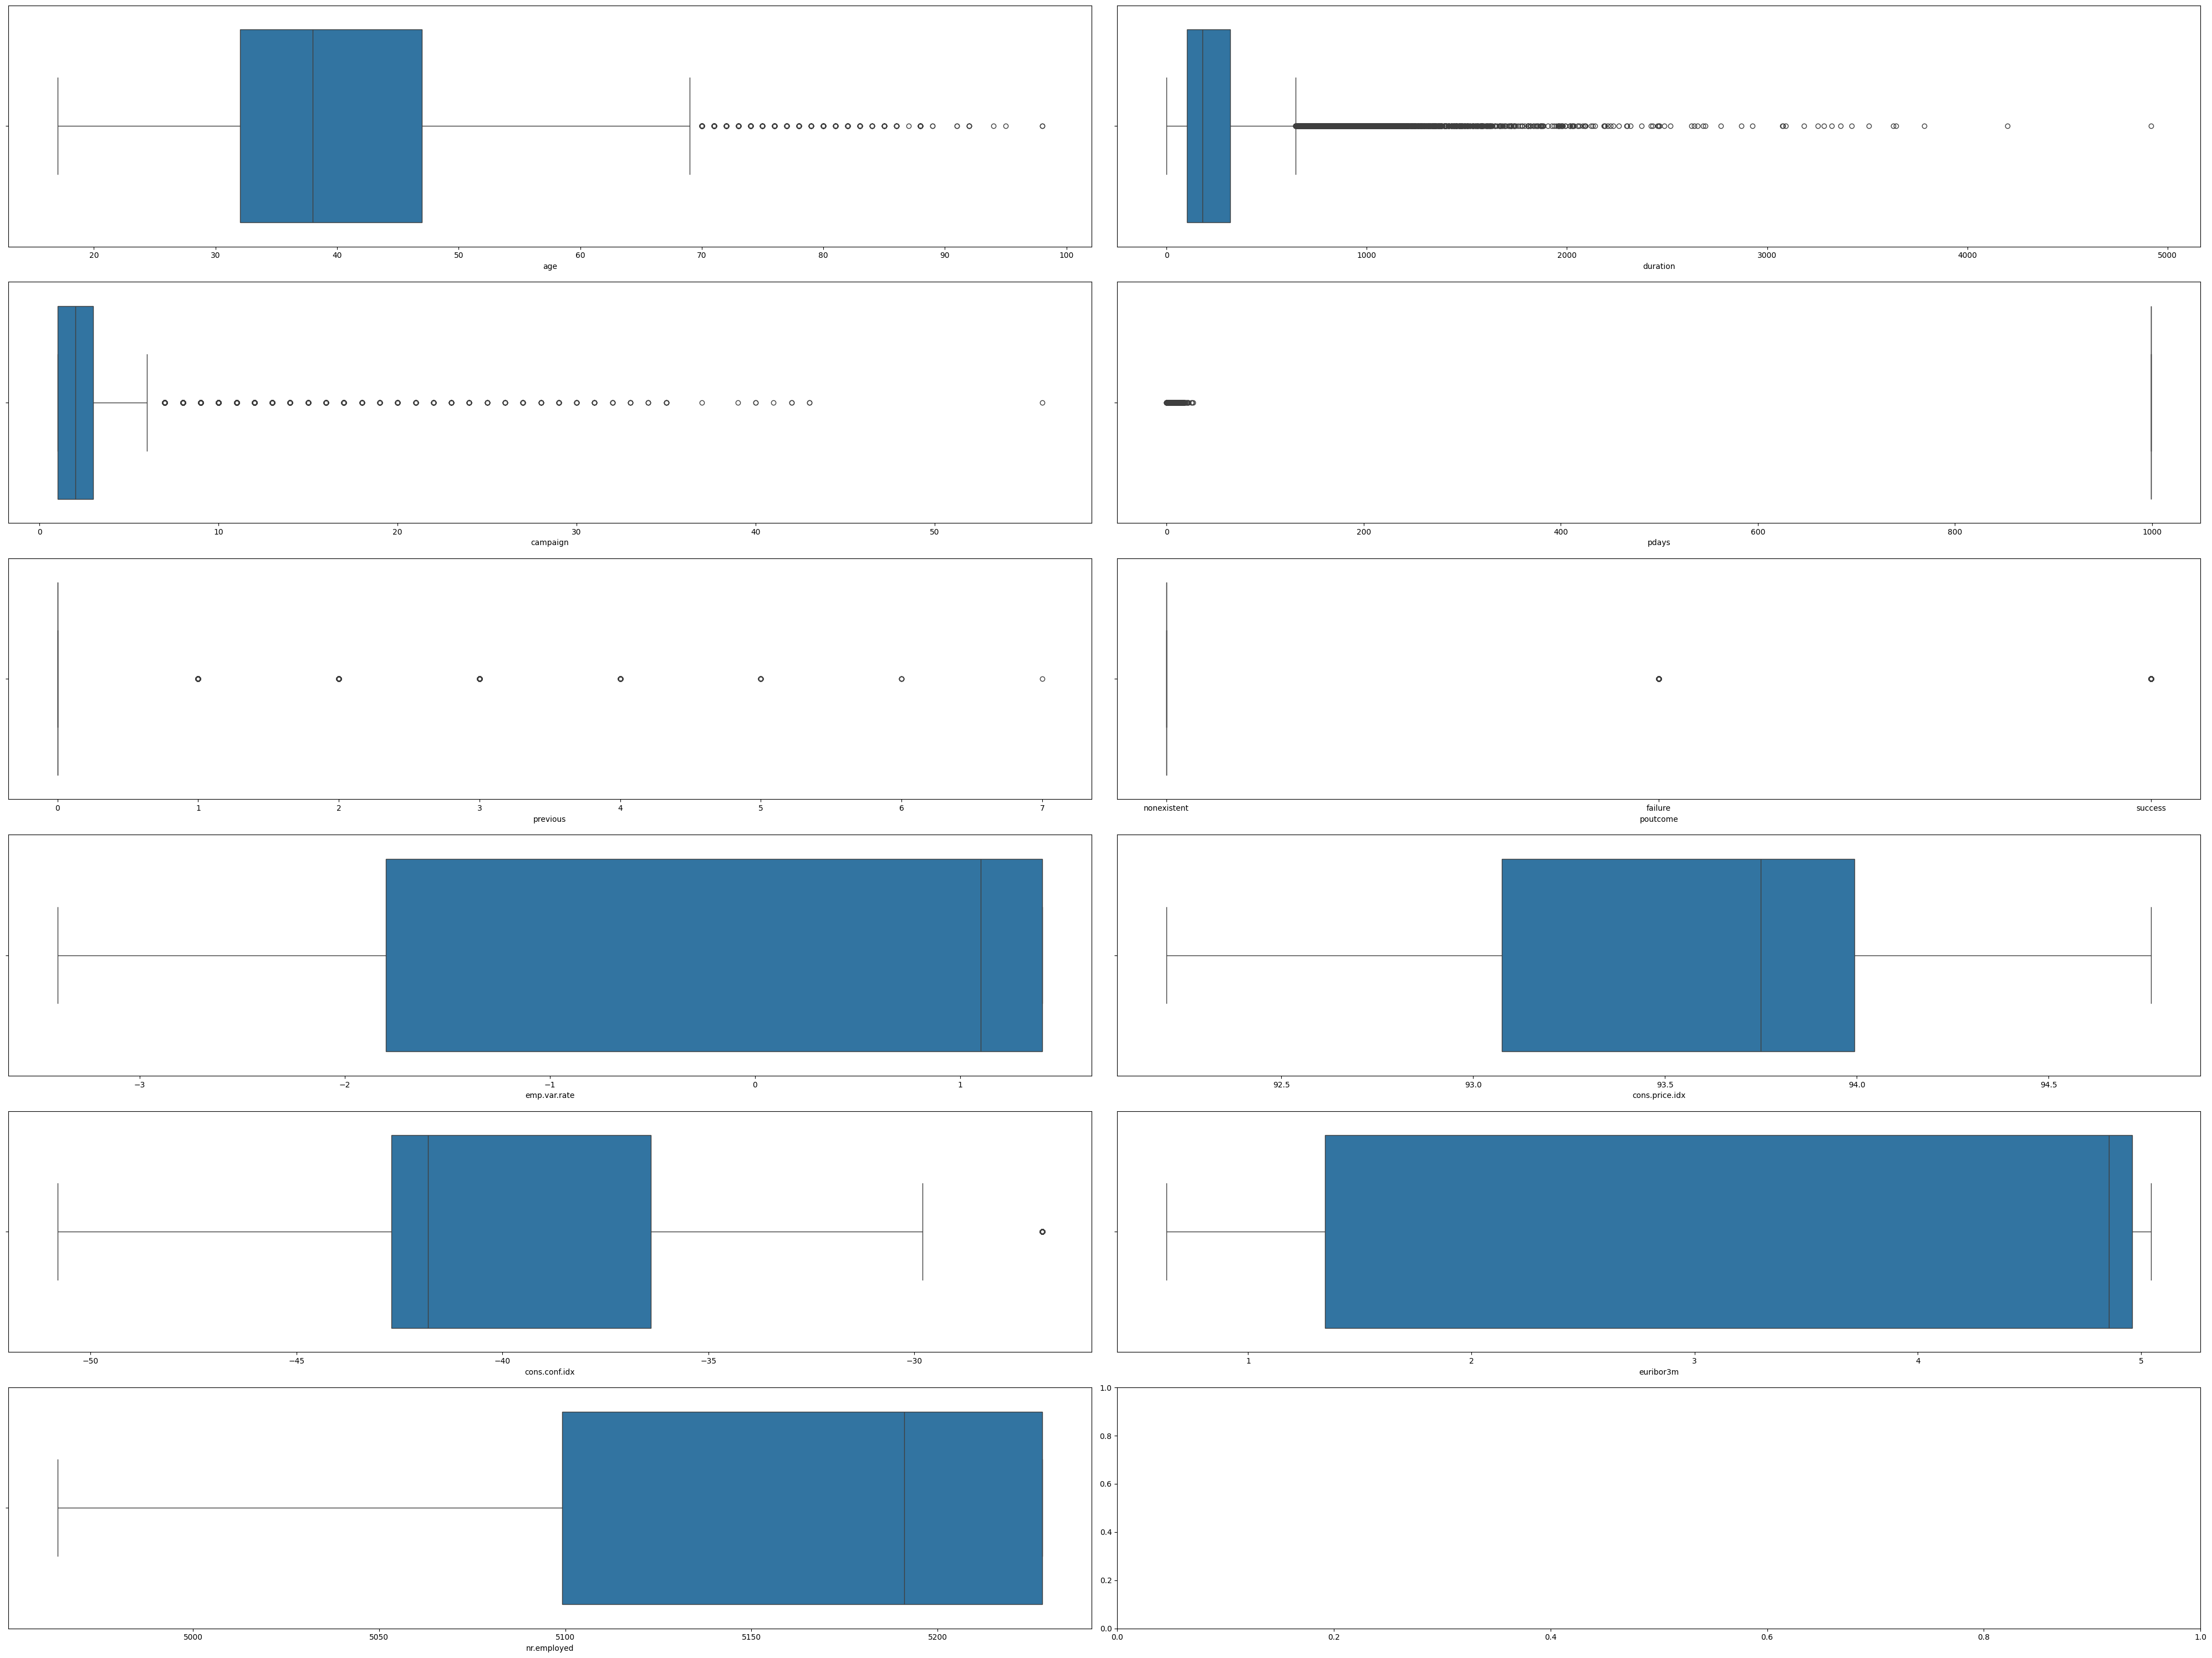

In [17]:
fig, axis = plt.subplots(6, 2, figsize=(40, 30))

sns.boxplot(ax=axis[0, 0], data=df, x='age')
sns.boxplot(ax=axis[0, 1], data=df, x='duration').set(ylabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x='campaign').set(ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x='pdays')
sns.boxplot(ax=axis[2, 0], data=df, x='previous').set(ylabel=None)
sns.boxplot(ax=axis[2, 1], data=df, x='poutcome').set(ylabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x='emp.var.rate').set(ylabel=None)
sns.boxplot(ax=axis[3, 1], data=df, x='cons.price.idx').set(ylabel=None)
sns.boxplot(ax=axis[4, 0], data=df, x='cons.conf.idx').set(ylabel=None)
sns.boxplot(ax=axis[4, 1], data=df, x='euribor3m').set(ylabel=None)
sns.boxplot(ax=axis[5, 0], data=df, x='nr.employed').set(ylabel=None)
plt.tight_layout()
plt.show()

#### Analisis variable multivariante



Analisis Numerico vs numerico

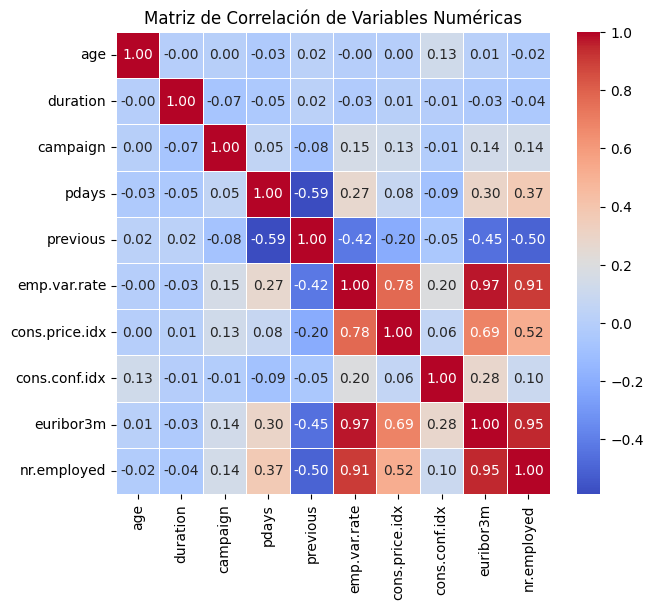

In [18]:
numeric_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

El gráfico muestra cómo se relacionan las variables numéricas entre sí. 
Correlación positiva (tonos rojos): Significa que si una cosa sube, la otra también sube.

Correlación negativa (tonos azules): Significa que si una cosa sube, la otra baja. 

Correlación nula (tonos blancos/cerca de cero): No hay relación clara entre ellas.


Las Relaciones Fuertes (Problema de Duplicidad)

Lo más importante que vemos es que hay varias variables que son casi idénticas en su comportamiento. Esto es como tener la misma información repetida varias veces.

Las variables `emp.var.rate`, `euribor3m` y `nr.employed` etán muy correlacionadas (casi llegan a 1.0, el máximo).

Esto nos dice que estas tres medidas económicas suben y bajan al mismo tiempo, como si fueran la misma cosa. En un análisis más avanzado, si intentamos predecir algo, solo necesitaríamos usar una de ellas, no las tres, porque las otras dos solo repiten la información.

Las Relaciones Negativas

También encontramos algunas relaciones donde una cosa sube y la otra baja:

Las variables económicas mencionadas antes (las que están en rojo) tienen una correlación negativa con las variables que miden el historial de contacto con el cliente (como `previous` y `pdays`).

Parece que cuando la economía estaba en mejores condiciones (variables económicas altas), los clientes tenían menos historial de contacto previo.

Las Variables Independientes

Finalmente, hay variables que están aisladas y no parecen tener una relación fuerte con casi nada más: La `age` (edad) y la `duration` (duración del último contacto) tienen valores de correlación muy cercanos a cero.

La edad de una persona o el tiempo que duró la última llamada no están relacionados de manera lineal con el estado de la economía o el historial de la campaña bancaria.

#### Analisis Numerico vs Categorico (Completo)

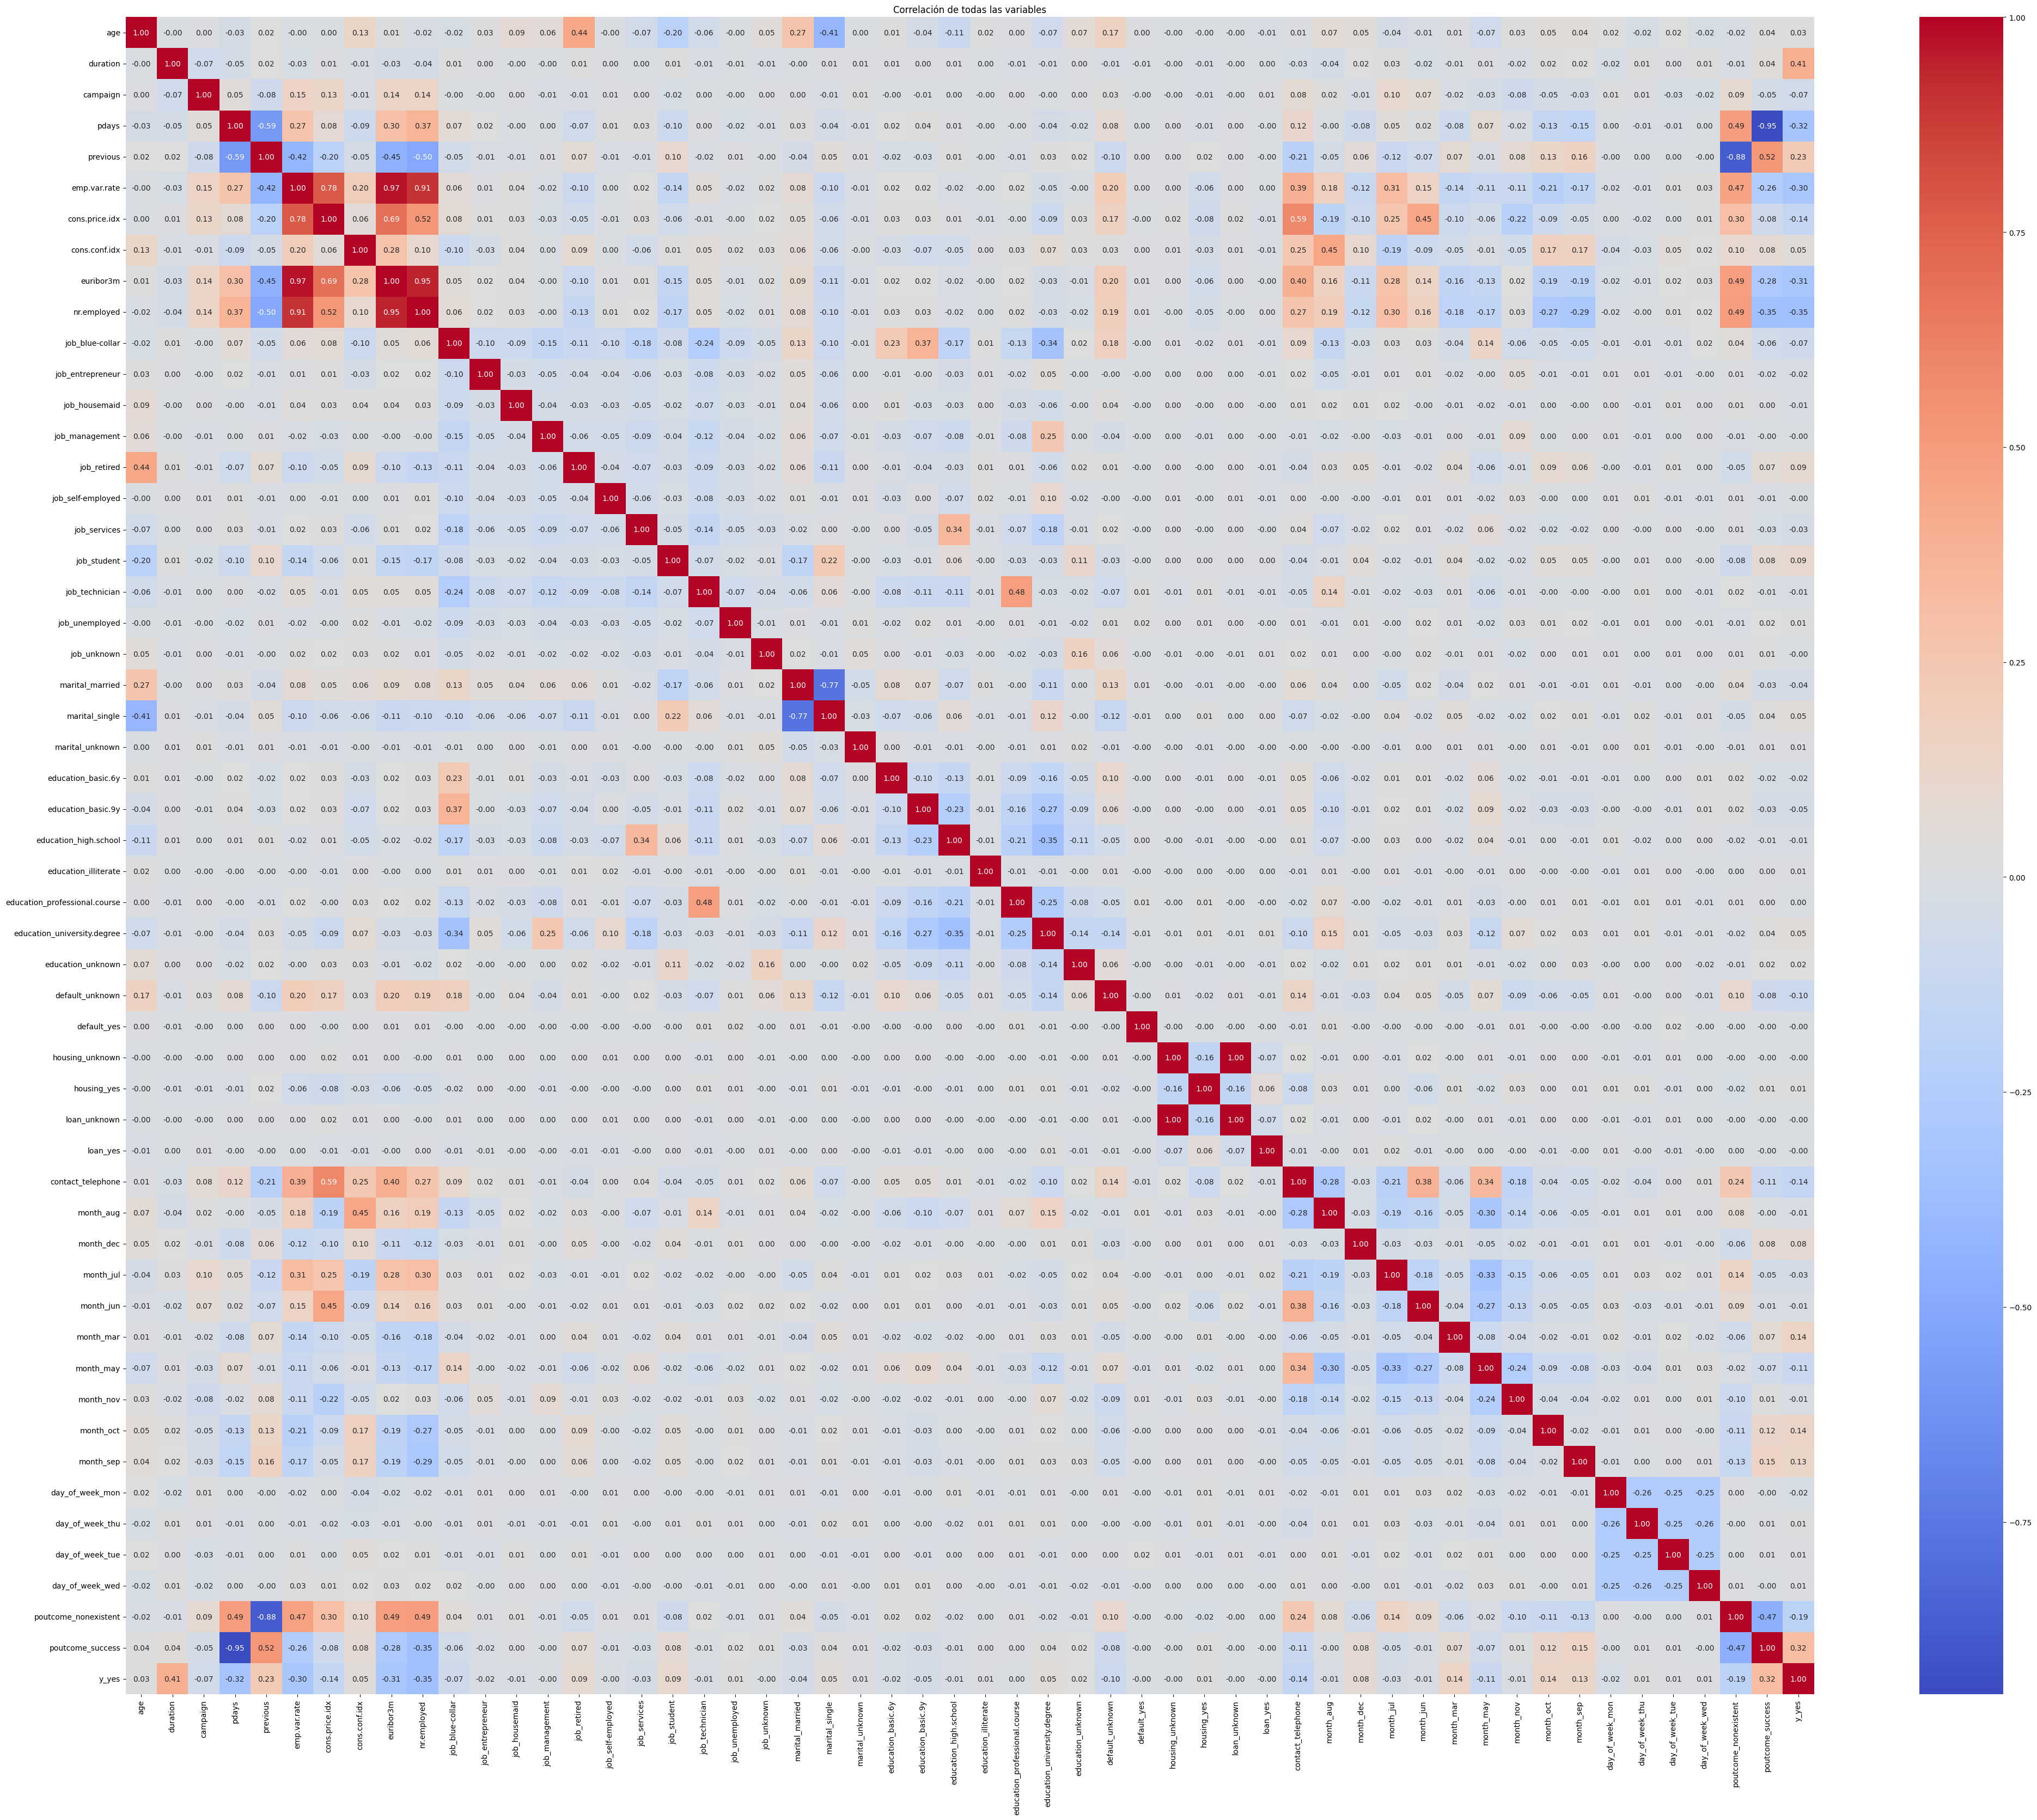

In [19]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


correlation_matrix = df_encoded.corr()

plt.figure(figsize=(50,40))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            cbar=True)
plt.title('Correlación de todas las variables')
plt.show()

1. Relaciones que Ayudan (Rojo Fuerte )
Estas son las cosas que hacen que sea más probable que un cliente diga "Sí" a la oferta:

`duration`: Cuanto más larga es la conversación telefónica, es mucho más probable que el cliente acepte. Ojo: Esto solo lo sabes cuando la llamada termina, no te sirve para saber a quién llamar primero.

`poutcome_success`: Si ya tuvimos éxito con ese cliente en una campaña anterior, es muy probable que acepte de nuevo.

`contact_cellular`: Contactar al cliente a un teléfono celular da mejores resultados que llamarlo a un teléfono fijo.

`month`: Los meses de Marzo, Octubre, Septiembre y Diciembre suelen ser los mejores momentos para hacer la oferta.



2. Relaciones que Perjudican (Azul Fuerte )
Estas son las cosas que hacen que sea menos probable que un cliente diga "Sí" a la oferta:

`euribor3m`: Cuando la tasa de interés (Euribor) está alta, los clientes quieren menos suscribirse al producto.

`emp.var.rate` : Una alta tasa de variación del empleo (que va de la mano con tasas de interés altas) hace que la gente acepte menos la oferta.

`day_of_week_mon`: Llamar a los clientes en Lunes es el peor día para la campaña, ya que se consigue menos éxito.

`poutcome_nonexistent`: Es más difícil conseguir que alguien diga "Sí" si nunca antes habíamos intentado contactarlo o no tenemos un registro previo. Es mejor tener algún historial.

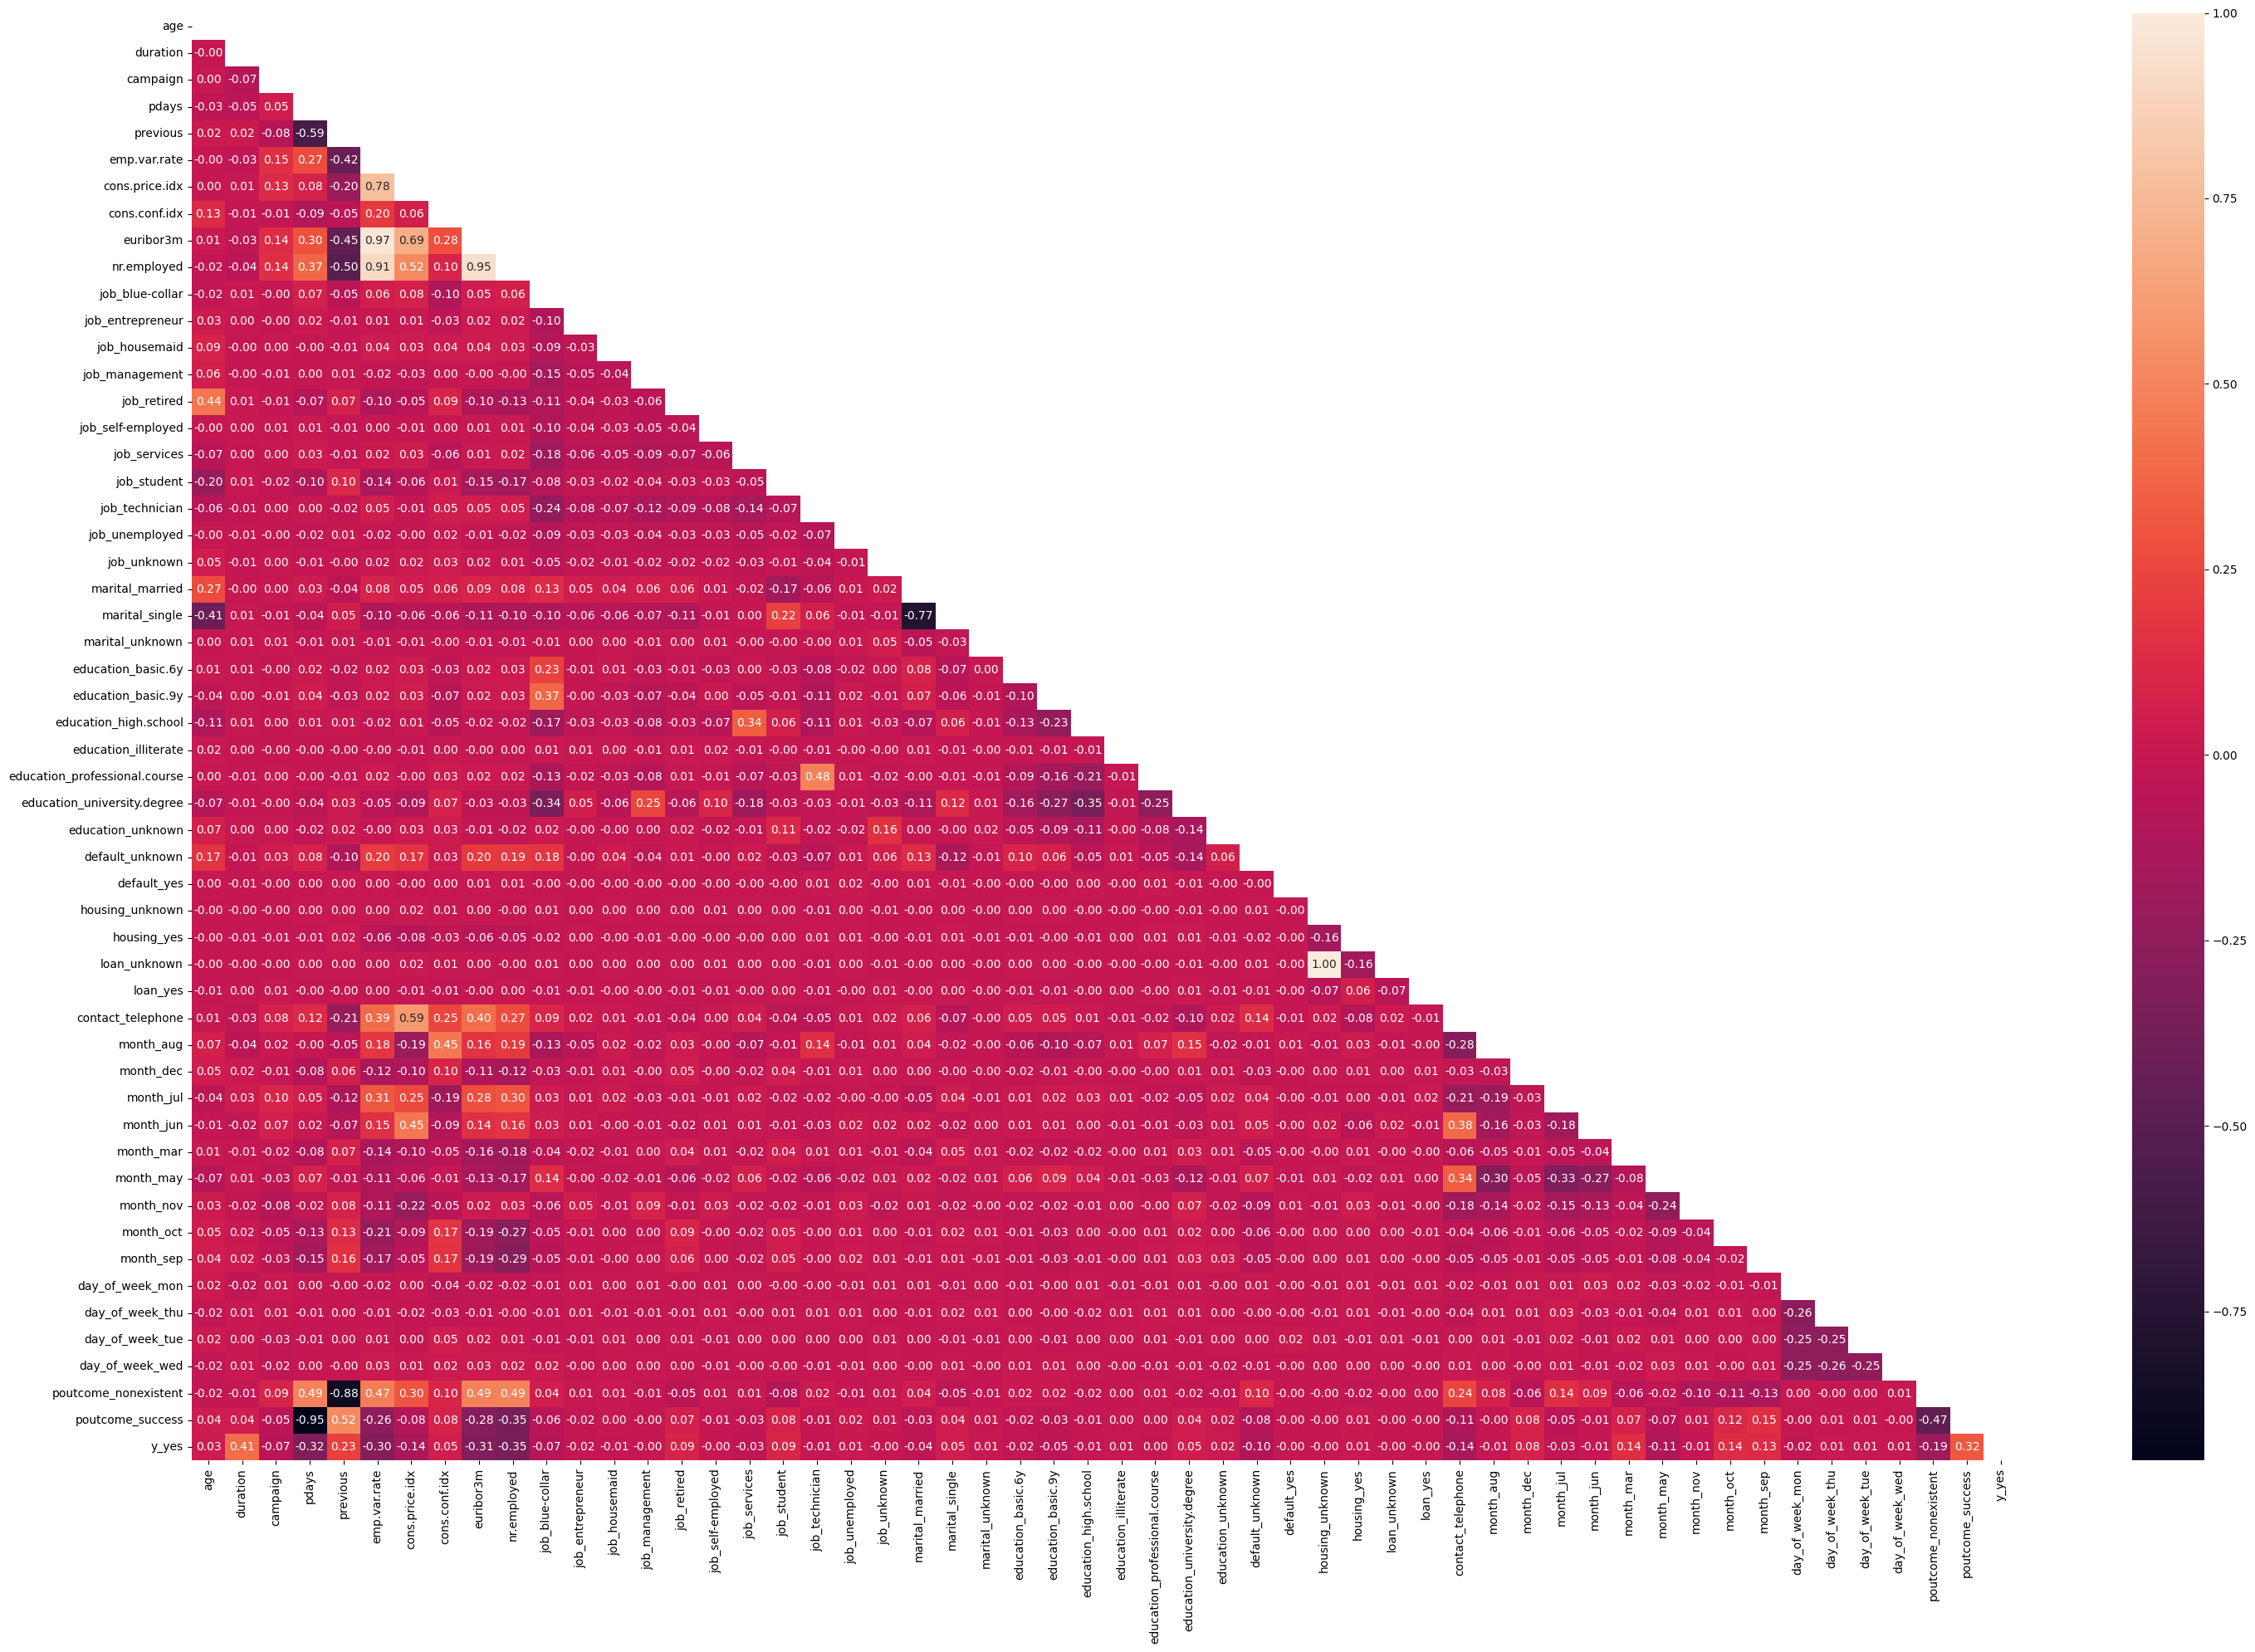

In [20]:

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

fig, axis = plt.subplots(figsize=(30,20))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

Si miramos el gráfico de la última fila (que asumimos es nuestro objetivo o meta), vemos que la conexión más fuerte es, lógicamente, la del objetivo consigo mismo. Dejando eso de lado, el factor que más se relaciona con el éxito de la meta es si el resultado anterior fue desconocido (0.60 de correlación positiva). En cambio, si el resultado anterior fue un fracaso (-0.50) o "otro" (-0.34), esto se relaciona negativamente; es decir, es menos probable que el cliente acepte ahora. Otros datos, como si hubo contactos previos (por ejemplo, 0.42) o la campaña actual, muestran una conexión positiva, pero más suave. Finalmente, la mayoría de los datos personales (edad, trabajo, estado civil) o de la campaña actual tienen una conexión casi nula (cercana a 0.00), lo que significa que no hay una relación simple y directa entre esas cosas y el éxito de nuestro objetivo.

El resultado de campañas anteriores (si fue un éxito, un fracaso o algo más) es lo que más ayuda a predecir el resultado de la campaña actual, porque esa información está muy relacionada con el objetivo. Por otro lado, datos personales como la edad, el trabajo o el estado civil casi no sirven para hacer esta predicción de forma directa o lineal. Por eso, al crear un modelo para predecir, debemos enfocarnos primero en las variables que hablan del resultado anterior, ya que son las más fuertes. Las variables personales, al ser tan débiles, podrían dejarse de lado a menos que se usen métodos muy avanzados para ver conexiones más complicadas.

### Paso 6

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


#### Analisis outlier

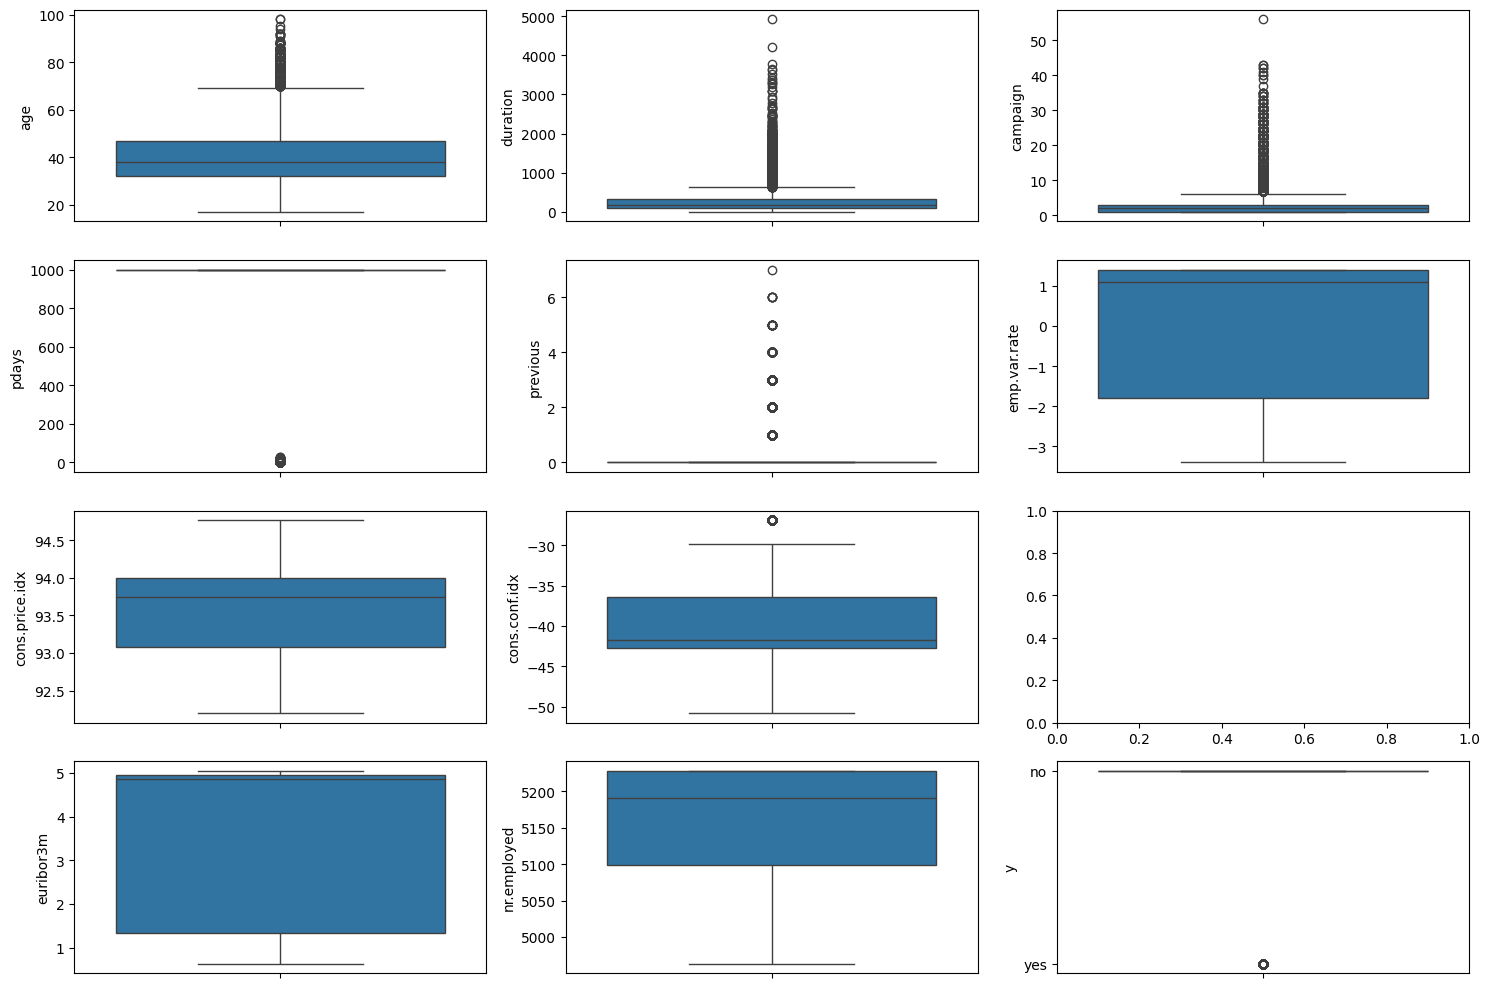

In [22]:
fig, axis = plt.subplots(4, 3, figsize=(15, 10))

sns.boxplot(ax=axis[0, 0], data=df, y="age")
sns.boxplot(ax=axis[0, 1], data=df, y="duration")
sns.boxplot(ax=axis[0, 2], data=df, y="campaign")
sns.boxplot(ax=axis[1, 0], data=df, y="pdays")
sns.boxplot(ax=axis[1, 1], data=df, y="previous")
sns.boxplot(ax=axis[1, 2], data=df, y="emp.var.rate")
sns.boxplot(ax=axis[2, 0], data=df, y="cons.price.idx")
sns.boxplot(ax=axis[2, 1], data=df, y="cons.conf.idx")
sns.boxplot(ax=axis[3, 0], data=df, y="euribor3m")
sns.boxplot(ax=axis[3, 1], data=df, y="nr.employed")
sns.boxplot(ax=axis[3, 2], data=df, y="y")

plt.tight_layout()
plt.show()

duration (Duración de la llamada):

Casi todas las llamadas son muy cortas (la mayoría de los datos están abajo), pero hay algunas llamadas extremadamente largas (los outliers positivos) que estiran mucho el promedio.

campaign (Veces contactado):

A la mayoría de las personas se les contactó muy pocas veces, pero hay unos pocos casos (outliers positivos) a los que se les llamó muchísimas veces (más de 40), lo cual es muy inusual.

age (Edad):

La mayor parte de la gente tiene una edad normal, pero tienes algunos casos inusuales de personas muy jóvenes (en el extremo inferior) y, sobre todo, muchas personas muy mayores (más de 80 años, en el extremo superior).

pdays (Días desde el último contacto):

La gran mayoría de la gente fue contactada hace mucho tiempo (999 días). Los outliers negativos son los pocos casos de personas que fueron contactadas hace muy poco (cerca de 0 días).

previous (Contactos previos):

Casi nadie había sido contactado antes (la mayoría es 0). Los outliers positivos son los pocos casos donde sí hubo uno o más contactos previos.

emp.var.rate (Cambio en la tasa de empleo):

Hay momentos o periodos inusuales donde el cambio en la tasa de empleo fue mucho más bajo de lo que es habitual (outliers negativos).

cons.price.idx y cons.conf.idx (Índices de Precios y Confianza):

Para estos indicadores económicos, hubo algunos meses o periodos con valores anormalmente bajos (outliers negativos) y, en el caso de la confianza, un valor anormalmente alto (outlier positivo).

euribor3m (Tasa de interés a 3 meses):

La tasa de interés usualmente se mueve en un rango, pero hubo periodos donde esta tasa estuvo inusualmente baja (outliers negativos).

nr.employed (Número de empleados):

El número de empleados en ciertas ocasiones fue notablemente menor de lo habitual (outliers negativos).

y (Variable Objetivo 0 o 1):

Esta variable muestra si el cliente dijo "Sí" (1) o "No" (0). Como la gente que dijo "Sí" es una minoría, el valor 1.0 se ve como un outlier en el gráfico. Esto es normal porque hay muchos más 0s que 1s (los datos están desbalanceados).

#### Análisis de valores faltantes

In [23]:
df.shape[1]

21

In [24]:
df.isnull().sum() / df.shape[0]

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [25]:
df.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [26]:
df.isnull().sum().sort_values(ascending=False) / len(df)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [27]:
df[df['y'].isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [28]:
df["duration"].median()

np.float64(180.0)

### Paso 7

fit()
transform()
get_support()
Primer Enfoque: Realizar cambios antes de hacer el split de datos
En este enfoque:

Primero se escala/codifica todo el dataset
Luego se divide en conjuntos de entrenamiento y prueba.
Ventaja:

Garantiza que los datos de entrenamiento y prueba están procesados de la misma manera, ya que se utilizan los mismos parámetros de escalado y/o sistema de codificación en todo el dataset.

Desventaja:

Introduce información del conjunto de prueba en el conjunto de entrenamiento (porque los parámetros de se calculan usando todo el dataset). Esto puede llevar a una sobreestimación del rendimiento del modelo, ya que el modelo ha "visto" indirectamente la distribución de los datos de test.

Segundo Enfoque: Realizar cambios después de hacer el split de datos.
En este enfoque:

Primero se divide el dataset en conjuntos de entrenamiento y prueba
Luego se procesa cada conjunto por separado (escalando/codificando) usando los parámetros que se calcularon sobre el conjunto de entrenamiento.
Ventaja:

Refleja mejor el escenario del mundo real donde el modelo no tiene acceso a los datos de prueba durante el entrenamiento. Esto asegura una evaluación justa del modelo en el conjunto de prueba.

Desventaja:

Puede haber ligeras diferencias en el procesamiento entre los conjuntos de entrenamiento y prueba, ya que los parámetros se basan solo en el conjunto de entrenamiento. Sin embargo, esto generalmente no es un problema si el conjunto de datos es lo suficientemente grande y representativo.

Realizamos el split

In [29]:
df.shape

(41188, 21)

In [30]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop("y", axis=1)
y = df["y"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)


X_train.shape


(32950, 20)

In [31]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
11348,55,retired,married,university.degree,unknown,yes,no,telephone,jun,thu,1012,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
38879,34,management,married,university.degree,no,no,no,cellular,nov,mon,75,1,999,0,nonexistent,-3.4,92.649,-30.1,0.714,5017.5
24510,53,housemaid,married,university.degree,no,no,no,cellular,nov,mon,53,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
38865,25,admin.,single,unknown,no,yes,no,telephone,nov,mon,643,4,999,0,nonexistent,-3.4,92.649,-30.1,0.714,5017.5
25238,36,admin.,married,high.school,no,yes,no,cellular,nov,tue,722,3,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5294,34,blue-collar,married,high.school,no,yes,no,telephone,may,fri,116,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1726,59,admin.,married,university.degree,no,no,yes,telephone,may,fri,186,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
35653,26,student,single,high.school,no,no,no,cellular,may,mon,123,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1
25720,35,blue-collar,single,professional.course,no,yes,yes,cellular,nov,wed,51,1,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8


In [32]:
X_test.shape

(8238, 20)

In [33]:
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
19829,49,admin.,married,high.school,no,no,no,cellular,aug,fri,151,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1
28042,32,technician,single,university.degree,no,yes,no,cellular,apr,thu,293,2,999,1,failure,-1.8,93.075,-47.1,1.483,5099.1
22342,31,technician,divorced,university.degree,no,yes,no,cellular,aug,thu,142,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
5229,57,blue-collar,married,basic.4y,unknown,yes,yes,telephone,may,fri,163,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
25731,29,management,single,university.degree,no,no,no,cellular,nov,wed,802,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18698,30,admin.,single,professional.course,no,yes,yes,cellular,jul,thu,9,18,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1
20166,35,technician,married,professional.course,no,yes,yes,cellular,aug,mon,228,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
10277,40,technician,married,professional.course,no,no,no,telephone,jun,mon,92,6,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1
35140,42,services,married,basic.9y,no,yes,no,cellular,may,fri,152,1,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1


### Paso 8

#### Scaling - Escalado de valores


El escalado de valores (feature scaling) es un paso crucial en el preprocesamiento de datos para muchos algoritmos de Machine Learning. Es una técnica que cambia el rango de los valores de los datos para que puedan ser comparables entre sí.

Algunas técnicas son:

Normalización, que es el proceso de cambiar los valores para que tengan una media de 0 y una desviación estándar de 1.
Mínimo-Máximo, que transforma los datos para que todos los valores estén entre 0 y 1.
A continuación detallaremos cómo podemos aplicar cada una de ellas, pero recordemos que depende mucho del modelo que vayamos a querer entrenar

#### Normalización

In [34]:
# TODO: Realizar el escalando con el dataset dividido (ahora lo estamos haciendo completo)
norm_scaler = StandardScaler()  # Instancia de: from sklearn.preprocessing import StandardScaler

num_variables = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx']
norm_features = norm_scaler.fit_transform(df[num_variables])

df_norm = pd.DataFrame(norm_features,
                       index=df.index,
                       columns=num_variables)
df_norm.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447
1,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447
2,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447
3,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447
4,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447


In [35]:
df_norm

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447
1,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447
2,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447
3,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447
4,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447
...,...,...,...,...,...,...,...
41183,3.164336,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953
41184,0.573445,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953
41185,1.533034,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953
41186,0.381527,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953


##### Escalado Mínimo-Máximo

In [36]:
# TODO: Realizar el escalando con el dataset dividido (ahora lo estamos haciendo completo)
min_max_scaler = MinMaxScaler()  # Instancia de: from sklearn.preprocessing import MinMaxScaler

num_variables = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx']
min_max_features = min_max_scaler.fit_transform(df[num_variables])

df_min_max = pd.DataFrame(min_max_features,
                          index=df.index,
                          columns=num_variables)
df_min_max

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
0,0.481481,0.000000,1.0,0.000000,0.937500,0.698753,0.60251
1,0.493827,0.000000,1.0,0.000000,0.937500,0.698753,0.60251
2,0.246914,0.000000,1.0,0.000000,0.937500,0.698753,0.60251
3,0.283951,0.000000,1.0,0.000000,0.937500,0.698753,0.60251
4,0.481481,0.000000,1.0,0.000000,0.937500,0.698753,0.60251
...,...,...,...,...,...,...,...
41183,0.691358,0.000000,1.0,0.000000,0.479167,1.000000,0.00000
41184,0.358025,0.000000,1.0,0.000000,0.479167,1.000000,0.00000
41185,0.481481,0.018182,1.0,0.000000,0.479167,1.000000,0.00000
41186,0.333333,0.000000,1.0,0.000000,0.479167,1.000000,0.00000


In [37]:
df_min_max.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx'],
      dtype='object')

##### One-Hot Encoding
Asigna un valor entero único a cada categoría.

Crea una columna binaria (0 o 1) para cada categoría.

Adecuado para variables categóricas nominales donde no hay un orden implícito.

No es conveniente cuando hay muchas categorías.

In [38]:
cat_variables = ['duration', 'euribor3m', 'nr.employed']

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

onehot_encoder.fit(X_train[cat_variables]) 

# Aplicamos el encoder en el conjunto de entrenamiento: X_train
X_train_cat_ohe_array = onehot_encoder.transform(X_train[cat_variables])
# The corrected line for the ValueError is here: ensure the array shape matches the index length
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe_array,
                               index=X_train.index,
                               columns=onehot_encoder.get_feature_names_out(cat_variables))

# Aplicamos el encoder en el conjunto de test: X_test
X_test_cat_ohe_array = onehot_encoder.transform(X_test[cat_variables])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe_array,
                              index=X_test.index,
                              columns=onehot_encoder.get_feature_names_out(cat_variables))

X_train_cat_ohe.head()

,duration_0,duration_1,duration_2,duration_3,duration_4,duration_5,duration_6,duration_7,duration_8,duration_9,...,nr.employed_4991.6,nr.employed_5008.7,nr.employed_5017.5,nr.employed_5023.5,nr.employed_5076.2,nr.employed_5099.1,nr.employed_5176.3,nr.employed_5191.0,nr.employed_5195.8,nr.employed_5228.1
11348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Paso 9: Selección de características

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_min_max.drop("age", axis=1),
                                                    df_min_max["age"],
                                                    test_size=0.2,
                                                    random_state=42)

# Con un valor de k=5 queremos decir implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k=5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

# Aplico el modelo a los datos X_train y X_test
selection_model_transform_train = selection_model.transform(X_train)
selection_model_transform_test = selection_model.transform(X_test)

# Genero los dataframes
X_train_sel = pd.DataFrame(selection_model_transform_train, columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model_transform_test, columns=X_test.columns.values[ix])

X_train_sel.head()

,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
0,1.0,0.000000,1.000000,0.669135,0.338912
1,1.0,0.000000,0.333333,0.269680,0.192469
2,1.0,0.142857,0.333333,0.269680,0.192469
3,1.0,0.000000,1.000000,0.669135,0.338912
4,1.0,0.000000,0.937500,0.698753,0.602510


In [40]:
scaler = StandardScaler()

# Ajustar (fit) solo sobre el conjunto de entrenamiento
scaler.fit(X_train_sel)

# Aplicar la transformación (transform) a entrenamiento y prueba
X_train_scaled = scaler.transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)

Aplicar el modelo de regresion

In [41]:
model_regresion = LinearRegression()

model_regresion.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
with open('../models/linear-regression.pkl.pkl', 'wb') as file:
    pickle.dump(model_regresion, file)

In [43]:
y_train_pred = model_regresion.predict(X_train_scaled)

# Predecir sobre el conjunto de prueba (para evaluar el rendimiento real)
y_test_pred = model_regresion.predict(X_test_scaled)

In [44]:
mse = mean_squared_error(y_test, y_test_pred)
mse

0.016051912018280958

In [45]:
r2 = r2_score(y_test, y_test_pred)

r2

0.019255222916173653

In [46]:
X_test

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
32884,0.000000,1.0,0.142857,0.333333,0.269680,0.192469
3169,0.018182,1.0,0.000000,0.937500,0.698753,0.602510
32206,0.000000,1.0,0.142857,0.333333,0.269680,0.192469
9403,0.054545,1.0,0.000000,1.000000,0.882307,0.376569
14020,0.018182,1.0,0.000000,1.000000,0.669135,0.338912
...,...,...,...,...,...,...
12322,0.000000,1.0,0.000000,1.000000,0.669135,0.338912
23440,0.109091,1.0,0.000000,1.000000,0.484412,0.615063
29431,0.200000,1.0,0.142857,0.333333,0.340608,0.154812
16627,0.018182,1.0,0.000000,1.000000,0.669135,0.338912


In [49]:

X_test_corrected = X_test.drop(columns=['pdays'])

# 2. Make the prediction using the corrected features (which now has 5 columns)
y_pred = model_regresion.predict(X_test_corrected)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [50]:

y_pred

array([0.28713349, 0.29241285, 0.28713349, ..., 0.28666368, 0.28734578,
       0.29241285], shape=(8238,))

In [51]:
y_test_pred

array([0.26772151, 0.29829969, 0.26772151, ..., 0.26585311, 0.2729801 ,
       0.29829969], shape=(8238,))

In [52]:
metrics = {'MSE': mean_squared_error(y_test, y_pred),
           'RMSE': root_mean_squared_error(y_test, y_pred),
           'MAPE' : mean_absolute_percentage_error(y_test, y_pred),
           'R^2': r2_score(y_test, y_pred),}

metrics

{'MSE': 0.01629035926568618,
 'RMSE': 0.12763369173414274,
 'MAPE': 325860313028.2932,
 'R^2': 0.004686497879782037}